In [1]:
import scipy.io
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, RocCurveDisplay, confusion_matrix, roc_curve, classification_report

#Import Data

mat = scipy.io.loadmat('digits.mat')
mat = {k:v for k, v in mat.items() if k[0] != '_'}
for i in mat:
        if '__' not in i and 'readme' not in i:
              np.savetxt(("filetest.csv"),mat[i],delimiter=',')
                
df = pd.DataFrame(mat['X'])
df['label'] = mat['y']


def plot_confusion_matrix(cm, title='Confusion matrix', cmap='Pastel1'):
    plt.figure(figsize=(9,9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 15)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
    plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
    plt.tight_layout()
    plt.ylabel('Actual label', size = 15)
    plt.xlabel('Predicted label', size = 15)
    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')

In [2]:
# Create 2 other data sets that have different pixel resolution
res16 = []
res8 = []
for i in np.arange(len(df)):
    newsize = resize(np.array(df.iloc[i,0:400]).reshape(20,20), (16,16), anti_aliasing=True).flatten()
    res16.append(newsize)
    newsize = resize(np.array(df.iloc[i,0:400]).reshape(20,20), (8,8), anti_aliasing=True).flatten()
    res8.append(newsize)
resize16 = pd.DataFrame(res16)
resize8 = pd.DataFrame(res8)

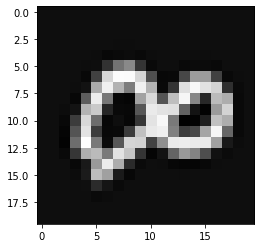

In [3]:
plt.imshow(np.array(df.iloc[4200,0:400]).reshape(20,20), interpolation='nearest', cmap='gray')
plt.savefig('20pix.png', bbox_inches='tight')

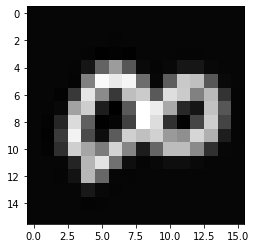

In [4]:
plt.imshow(np.array(resize16.iloc[4200,0:400]).reshape(16,16), interpolation='nearest', cmap='gray')
plt.savefig('16pix.png', bbox_inches='tight')

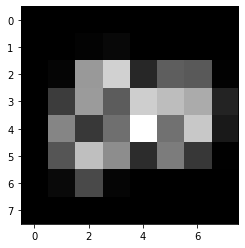

In [5]:
plt.imshow(np.array(resize8.iloc[4200,0:400]).reshape(8,8), interpolation='nearest', cmap='gray')
plt.savefig('8pix.png', bbox_inches='tight')

In [6]:
# Step 3: Spit data into training and testing, and fit the right classificaiton mdoel

# # original size (20 x 20)
# x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 0:400], df.iloc[:,-1], test_size=0.1, stratify = df.iloc[:,-1])

# 16 x 16
x_train, x_test, y_train, y_test = train_test_split(resize16.iloc[:, 0:400], df.iloc[:,-1], test_size=0.3, stratify = df.iloc[:,-1])

# # 8 x 8
# x_train, x_test, y_train, y_test = train_test_split(resize8.iloc[:, 0:400], df.iloc[:,-1], test_size=0.4, stratify = df.iloc[:,-1])

In [7]:
#run model

RndFst = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=50)
RndFst.fit(x_train,y_train)

rf_predictions = RndFst.predict(x_test)
rf_proba_predictions = RndFst.predict_proba(x_test)


In [8]:
print(classification_report(y_test, rf_predictions, digits=4, target_names=['0','1','2','3','4','5','6','7','8','9']))

              precision    recall  f1-score   support

           0     0.9177    0.9667    0.9416       150
           1     0.8936    0.8400    0.8660       150
           2     0.8403    0.8067    0.8231       150
           3     0.8354    0.8800    0.8571       150
           4     0.9386    0.7133    0.8106       150
           5     0.8598    0.9400    0.8981       150
           6     0.8919    0.8800    0.8859       150
           7     0.8411    0.8467    0.8439       150
           8     0.7824    0.8867    0.8313       150
           9     0.9474    0.9600    0.9536       150

    accuracy                         0.8720      1500
   macro avg     0.8748    0.8720    0.8711      1500
weighted avg     0.8748    0.8720    0.8711      1500



Confusion matrix
[[145   0   0   0   0   2   2   1   0   0]
 [  4 126   0   4   0   6   2   6   1   1]
 [  1   4 121   0   2   1   4   8   9   0]
 [  1   2   0 132   0   7   0   1   7   0]
 [  2   3  19   2 107   3   0   3   6   5]
 [  0   3   0   3   1 141   1   1   0   0]
 [  2   2   0   6   0   0 132   0   7   1]
 [  2   1   4   3   4   3   0 127   6   0]
 [  1   0   0   8   0   0   6   1 133   1]
 [  0   0   0   0   0   1   1   3   1 144]]


<Figure size 432x288 with 0 Axes>

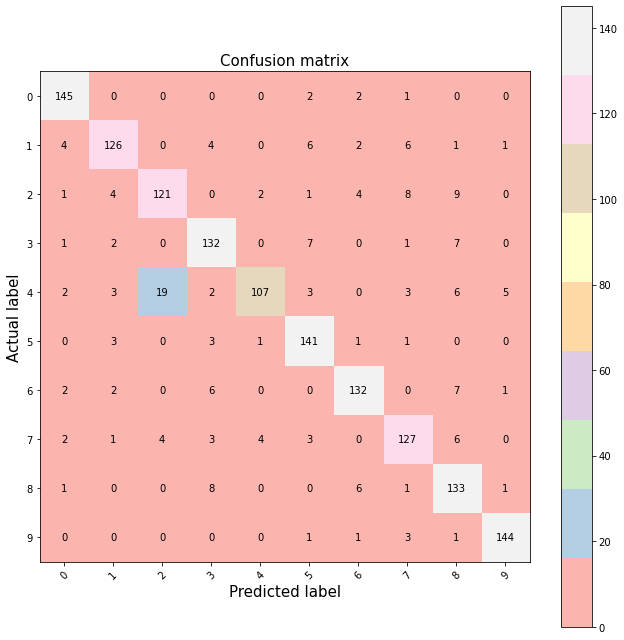

In [9]:
# confusion matrix
confusion = confusion_matrix(y_test, rf_predictions)
print('Confusion matrix')
print(confusion)
plt.figure()
plot_confusion_matrix(confusion);
plt.savefig('digitcm.png', bbox_inches='tight')
plt.show();

In [10]:
#generate tpr and fpr for roc curve

rfp5 = []
for i in np.arange(len(rf_proba_predictions)):
    x = rf_proba_predictions[i][4]
    rfp5.append(x)
    
fpr5, tpr5, _ = roc_curve(y_test,  rfp5, pos_label=5)


rfp6 = []
for i in np.arange(len(rf_proba_predictions)):
    x = rf_proba_predictions[i][5]
    rfp6.append(x)    
    
fpr6, tpr6, _ = roc_curve(y_test,  rfp6, pos_label=6)    

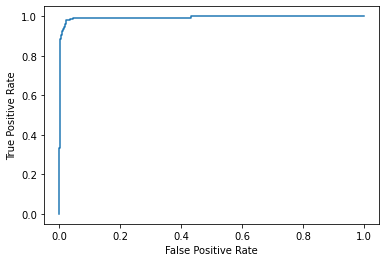

In [11]:
plt.plot(fpr6,tpr6)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('roc6.png', bbox_inches='tight')

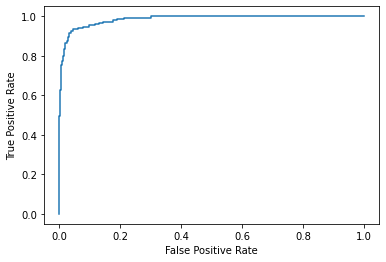

In [12]:
plt.plot(fpr5,tpr5)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('roc5.png', bbox_inches='tight')

Confusion matrix
[[145   0   0   0   0   2   2   1   0   0]
 [  4 126   0   4   0   6   2   6   1   1]
 [  1   4 121   0   2   1   4   8   9   0]
 [  1   2   0 132   0   7   0   1   7   0]
 [  2   3  19   2 107   3   0   3   6   5]
 [  0   3   0   3   1 141   1   1   0   0]
 [  2   2   0   6   0   0 132   0   7   1]
 [  2   1   4   3   4   3   0 127   6   0]
 [  1   0   0   8   0   0   6   1 133   1]
 [  0   0   0   0   0   1   1   3   1 144]]


<Figure size 432x288 with 0 Axes>

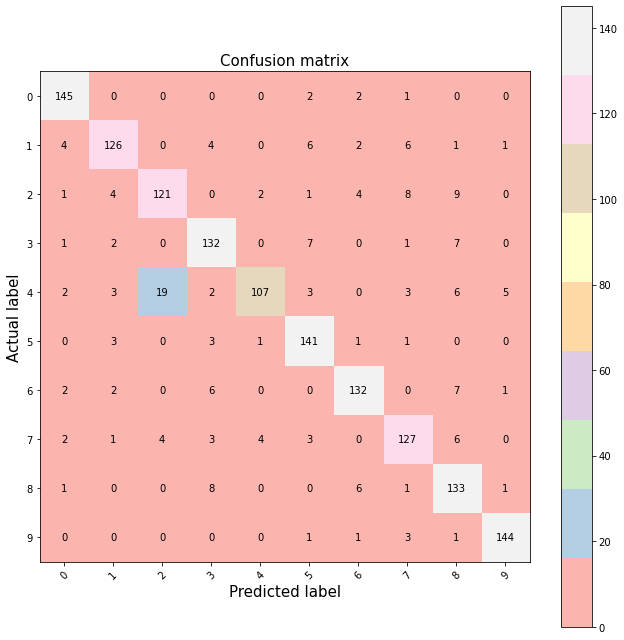

In [13]:
# confusion matrix
confusion = confusion_matrix(y_test, rf_predictions)
print('Confusion matrix')
print(confusion)
plt.figure()
plot_confusion_matrix(confusion);
plt.savefig('digitcm.png', bbox_inches='tight')
plt.show();

20 x 20:
40%, digit '5'   Recall: 0.95 Precision: 0.956
40%, digit '6'   Recall: 0.93 Precision:  